                   roi  volume  type  level      icv      tbv
12540  Telencephalon_L  467063     1      1  1195015  1123076
12541  Telencephalon_R  470488     1      1  1195015  1123076
12542   Diencephalon_L    8801     1      1  1195015  1123076
12543   Diencephalon_R    9054     1      1  1195015  1123076
12544    Mesencephalon    9564     1      1  1195015  1123076
12545    Metencephalon  154071     1      1  1195015  1123076
12546   Myelencephalon    4035     1      1  1195015  1123076
12547              CSF   71939     1      1  1195015  1123076
   type  level   volume
0     1      1  1195015
1     1      2  1195021
2     1      3  1195034
3     1      4  1195065
4     1      5  1195124
5     2      1  1195015
6     2      2  1195022
7     2      3  1195032
8     2      4  1195041
9     2      5  1195092


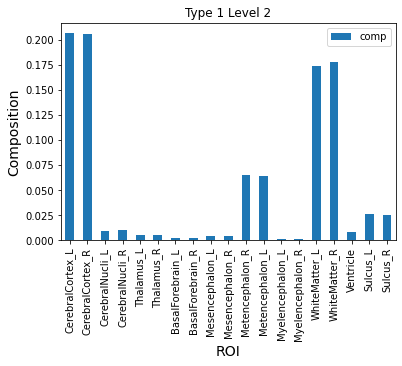

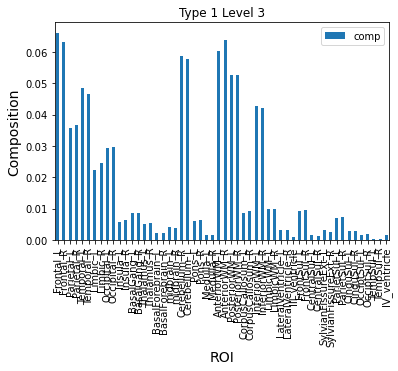

In [5]:
#%% ####################################
# Q1: Kirb21 data
# ######################################
import pandas as pd
import matplotlib.pyplot as plt

# Download the Kirb21 data
df = pd.read_csv('https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv')
# Pull out subject with rawid equal to kirby906a_ax.img
df = df.loc[(df.rawid == 'kirby906a_ax.img')]
# Get rid of the unnecessary column
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std', 'id'], axis = 1)

# STEP 1    
# Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]
# Create a new column based on ICV (sum of the Type I Level 1 structures and cerebrospinal fluid)
t1l1 = t1l1.assign(icv = sum(t1l1.volume))
# Create a new column based on TBV (sum of the volume for all rows except CSF)
t1l1 = t1l1.assign(tbv = sum(t1l1.volume[(t1l1.roi != 'CSF')]))
print(t1l1)

# STEP 2
grouped_df = df.groupby(['type', 'level'], as_index=False)['volume'].sum()
print(grouped_df)

# STEP 3
# Plot Type 1 Level 2 (t1l2) data
t1l2 = df.loc[(df.type == 1) & (df.level == 2)]
t1l2 = t1l2.assign(icv = sum(t1l2.volume))
t1l2 = t1l2.assign(comp = lambda x: x.volume / x.icv)
t1l2.plot.bar(x='roi',y='comp')
plt.title('Type 1 Level 2')
plt.xlabel('ROI', fontsize=14)
plt.ylabel('Composition', fontsize=14)
plt.show()
# Plot Type 1 Level 3 (t1l3) data
t1l3 = df.loc[(df.type == 1) & (df.level == 3)]
t1l3 = t1l3.assign(icv = sum(t1l3.volume))
t1l3 = t1l3.assign(comp = lambda x: x.volume / x.icv)
t1l3.plot.bar(x='roi',y='comp')
plt.title('Type 1 Level 3')
plt.xlabel('ROI', fontsize=14)
plt.ylabel('Composition', fontsize=14)
plt.show()


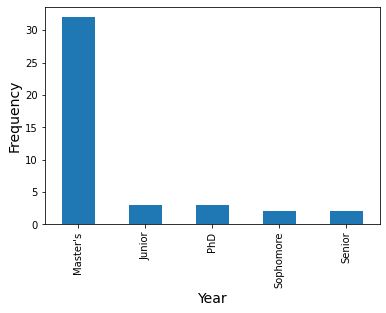

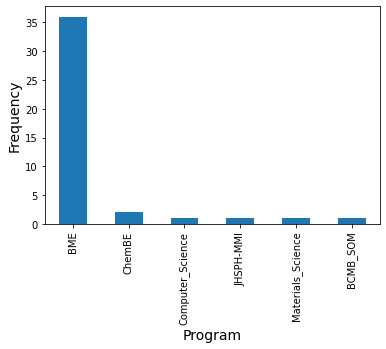

In [6]:
#%% ####################################
# Q2: Class data
# ######################################
import pandas as pd
import matplotlib.pyplot as plt

# Read in the class data
df = pd.read_csv('https://raw.githubusercontent.com/bcaffo/ds4ph-bme/master/data/classInterests.txt', sep='\t')

# bar plots of year
year_counts = df["Year"].value_counts()
year_counts.plot.bar(x='Index', y='Year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# bar plots of program
year_counts = df["Program"].value_counts()
year_counts.plot.bar(x='Index', y='Program')
plt.xlabel('Program', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [10]:
#%% ####################################
# Q3: Gene expression dataset (normalization)
# ######################################
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/GSE5859_exprs.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# subtract the row mean from each row
df = df.sub(df.mean(axis=1), axis=0)

# subtract the column mean from each column
df = df.sub(df.mean(axis=0), axis=1)

# divide each column by its standard deviation
df = df / df.std(axis=0)

# show first 20 rows
df.head(20)


,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,-0.062810,-1.694428,-0.797346,0.362538,-1.152413,0.366177,1.252187,-0.054154,1.008166,-0.730639,...,1.446603,-0.185273,1.615970,0.245537,-0.568262,-0.069236,0.617954,-0.598607,0.088393,0.257410
1,0.484259,0.835005,1.434085,-0.316432,0.141554,-0.076237,-0.745136,-0.148166,-0.250652,-0.497815,...,-1.094982,0.985940,0.538265,-0.521649,0.195814,0.365237,-0.422815,0.408542,-1.573530,1.173822
2,0.789673,-1.707110,-1.548943,-0.245036,-1.015618,-0.637799,-1.096388,-1.031533,0.992122,0.696068,...,1.564055,-0.694512,-0.395453,0.904341,-0.130702,0.080440,-0.977132,-0.197351,0.140632,-0.701024
3,-1.599798,-1.460817,-0.134750,1.138467,-1.255766,1.368016,1.357039,-0.486577,-0.260531,0.375192,...,1.300847,0.299944,0.918732,-1.166704,-0.321440,-1.714599,0.633897,0.028623,-0.591095,-0.764897
4,1.090032,-0.216675,-0.238137,0.480868,-0.479461,-0.082265,0.247916,-0.347177,-0.172784,-0.186654,...,0.239831,-0.445844,-0.016443,-0.209588,0.141031,-0.423519,-0.141661,0.037831,0.064544,-0.106213
5,1.241975,-0.535534,0.083145,-1.481132,0.050370,-1.959316,-0.974212,0.971620,0.902301,0.738677,...,0.008054,-0.528349,-2.534251,1.904470,-0.154389,-0.218374,0.168561,-0.757998,0.748029,0.275634
6,-0.286203,-0.674994,-0.571512,0.606953,-0.407212,0.936406,0.436588,-0.796466,0.732997,0.348874,...,0.919936,-0.315825,-0.038902,-0.823825,-0.995888,-0.062965,0.149916,-0.288688,0.617835,-0.252480
7,-1.409036,-0.250727,0.023742,-0.040478,-0.985327,1.045725,1.207477,-0.110860,0.311823,-0.034340,...,0.273110,-0.231129,-0.091514,-0.435654,-0.170300,-0.102390,-0.254115,0.056107,0.424685,-0.131043
8,-0.558525,-0.484504,0.208965,0.561537,-0.816938,0.413012,0.472788,-0.074892,0.757774,0.078242,...,0.585975,-0.713374,0.177124,-0.018744,-0.587280,-0.330971,-0.128001,0.006118,-0.335249,-0.188138
9,-0.720946,-1.074023,0.051934,0.269967,-0.669813,0.533172,0.753275,-0.384582,-0.303810,0.109432,...,1.081922,-0.685037,0.374179,-0.423531,-0.533590,-0.579827,0.535320,-0.073800,-0.102127,-0.072184


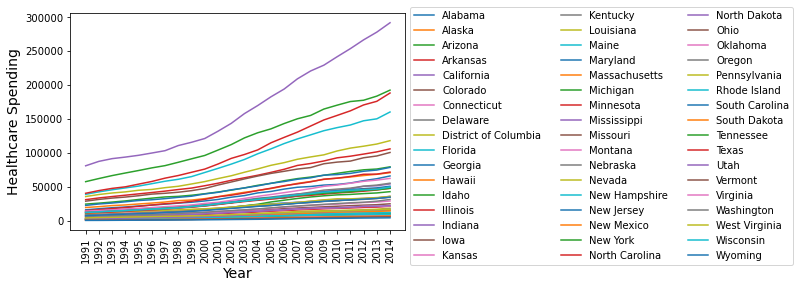

In [11]:
#%% ####################################
# Q4: Healthcare spending versus time color coded by states
# ######################################
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv', skiprows=2, index_col=0)
df = df.drop(df.index[0]) # drop the United States row
df = df.drop(df.index[51:]) # drop nan rows
df = df.T # transpose
df.plot()
plt.xticks(np.arange(24), ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'])
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Healthcare Spending', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left', ncol=3)
plt.show()


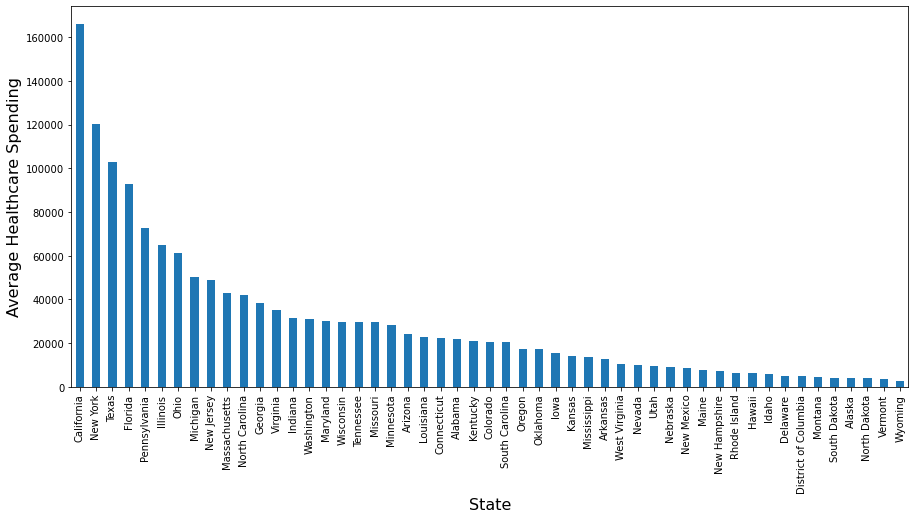

In [13]:
#%% ####################################
# Q5: Average Healthcare Spending by State
# ######################################
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv', skiprows=2, index_col=0)
df = df.drop(df.index[0]) # drop the United States row
df = df.drop(df.index[51:]) # drop nan rows
df = df.T # transpose

# average spending over years
avg = df.mean(axis=0).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15,7))
avg.plot.bar(ax=ax)
plt.xlabel('State', fontsize=16)
plt.ylabel('Average Healthcare Spending', fontsize=16)
plt.show()
